In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import htwt
from numpy.linalg import eigh, det

In [6]:
X, y = htwt.get()
X = X[y == 1]

In [25]:
x_bar = np.mean(X, axis = 0)
Sigma = np.cov(X, ddof = 0, rowvar = False)

In [44]:
vals, vecs = eigh(Sigma)
order = vals.argsort()[::-1]
vals = vals[order]
vecs = vecs[:, order]
nstd  = 1
width, height = 2 * nstd * np.sqrt(vals)
theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
ellipse = Ellipse(xy = x_bar, width = width, height = height, angle = theta)

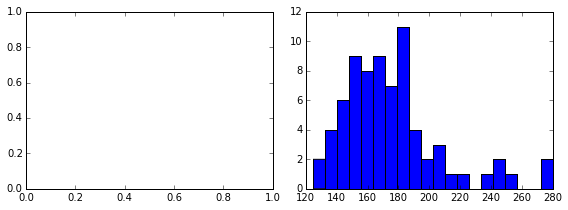

In [45]:
plt.figure(figsize = (8, 3))
plt.subplot(1, 2, 1) # aspect = 'equal')
plt.gca().add_artist(ellipse)
plt.subplot(1, 2, 2)
plt.hist(X[:, 1], bins = 20)
plt.tight_layout()
plt.show()